In [1]:
import tensorflow as tf
import keras
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
use_bias = True
standart = False

In [3]:
N = 500
M = int(N/10)

X_hor = random.uniform(0, 1)
X_train = []
for i in range(N):
    x = random.uniform(-5, 5)
    y = random.uniform(x + X_hor, 5)
    X_train.append([x, y])
    
for i in range(N):
    x = random.uniform(-5, 5)
    y = random.uniform(-5, x - X_hor)
    X_train.append([x, y])
X_train = np.array(X_train)

X_hor = random.uniform(0, 1)
X_test = []
for i in range(M):
    x = random.uniform(-5, 5)
    y = random.uniform(x + X_hor, 5)
    X_test.append([x, y])
    
for i in range(M):
    x = random.uniform(-5, 5)
    y = random.uniform(-5, x - X_hor)
    X_test.append([x, y])
X_test = np.array(X_test)

#Создание массива меток
y_train = np.array([0]*N + [1]*N)
y_test = np.array([0]*M + [1]*M)

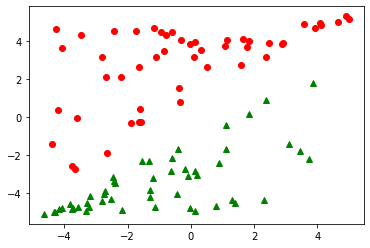

In [4]:
#Вывод обучаещего множества
plt.plot(X_train[:50, 0], X_train[:50, 1], 'ro', X_train[500:550, 0], X_train[500:550, 1], 'g^')

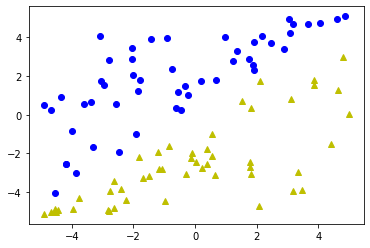

In [5]:
#Вывод оценочного множества
plt.plot(X_test[:50, 0], X_test[:50, 1], 'bo',X_test[50:100, 0], X_test[50:100, 1], 'y^')

In [6]:
#Вывод множества, если используется стандартизация
if standart:
    scaler = StandardScaler(copy = False).fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    plt.plot(X_train[:50, 0], X_train[:50, 1], 'ro',X_train[500:550, 0], X_train[500:550, 1], 'g^')

In [7]:
#Построение модели
input_layer = keras.layers.Input(2)
one_neuron = keras.layers.Dense(1, use_bias = use_bias) (input_layer)
output_layer = keras.layers.Activation('sigmoid') (one_neuron)

In [8]:
model = keras.models.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Компиляция модели
model.compile(
    loss = 'binary_crossentropy', #binary_crossentropy
    optimizer = 'adam',
    metrics = ['accuracy']
)

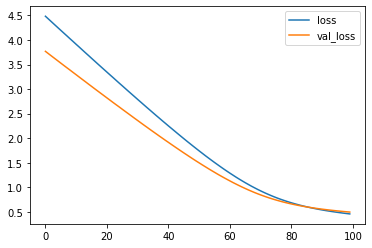

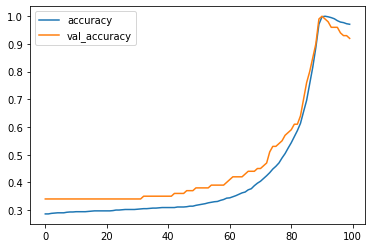

In [10]:
#Обучение и вывод графика
history = model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    batch_size = 64,
    epochs = 100,
    verbose = 0
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();

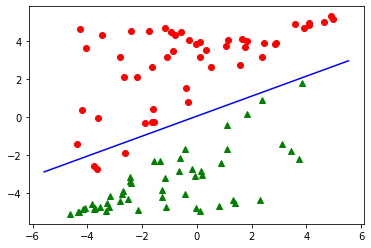

In [11]:
#Вывод гиперплоскости
plt.plot(X_train[:50, 0], X_train[:50, 1], 'ro',X_train[500:550, 0], X_train[500:550, 1], 'g^')

x = np.linspace(np.min(X_train), np.max(X_train), 1000)

if use_bias:
    y = (- model.layers[1].get_weights()[1] - model.layers[1].get_weights()[0][0] * x)/(model.layers[1].get_weights()[0][1])
else:
    y = (- model.layers[1].get_weights()[0][0] * x)/(model.layers[1].get_weights()[0][1])

plt.plot(x, y, color = 'b')


Точность на тестовом множестве:  0.92


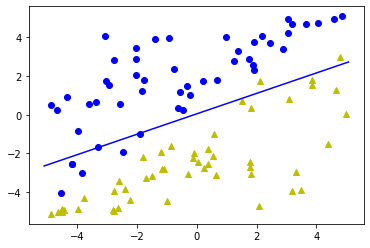

In [12]:
predictions = np.round( model.predict(X_test).flatten() )

# plt.plot(X_test[predictions == 0, 0], X_test[predictions == 0, 1], 'bo')
# plt.plot(X_test[predictions == 1, 0], X_test[predictions == 1, 1], 'y^')
plt.plot(X_test[:50, 0], X_test[:50, 1], 'bo',X_test[50:100, 0], X_test[50:100, 1], 'y^')

x = np.linspace(np.min(X_test), np.max(X_test), 1000)

if use_bias:
    y = (- model.layers[1].get_weights()[1] - model.layers[1].get_weights()[0][0] * x)/(model.layers[1].get_weights()[0][1])
else:
    y = (- model.layers[1].get_weights()[0][0] * x)/(model.layers[1].get_weights()[0][1])
    
plt.plot(x, y, color = 'b')

print("Точность на тестовом множестве: ", np.sum(predictions == y_test) / y_test.shape[0])



In [13]:
#Вывод весов
print('X weight: ', model.layers[1].get_weights()[0][0], '\n Y weight: ', model.layers[1].get_weights()[0][1])
if use_bias:
    print('Bias: ', model.layers[1].get_weights()[1])

X weight:  [0.10793215] 
 Y weight:  [-0.20516698]
Bias:  [0.00989997]
